Diccionario de Datos:

* fixed acidity: Acidez fija en g/dm³.
* volatile acidity: Acidez volátil en g/dm³.
* citric acid: Ácido cítrico en g/dm³.
* residual sugar: Azúcar residual en g/dm³.
* chlorides: Cloruros en g/dm³.
* free sulfur dioxide: Dióxido de azufre libre en mg/dm³.
* total sulfur dioxide: Dióxido de azufre total en mg/dm³.
* density: Densidad en g/cm³.
* pH: Nivel de pH.
* sulphates: Sulfatos en g/dm³.
* alcohol: Porcentaje de alcohol en % vol.
* quality: Calidad del vino (variable objetivo, escala de 0 a 10).

In [1]:
# importamos las librrias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# cargamos el dataset
ruta = '../data/winequality-red.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=';')
df.shape # visualizamos la dimension del dataset

(1599, 12)

In [3]:
df.head() # exploramos las primeras 5 lineas

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1. Limpieza de Datos:
* Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
* Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
* Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
* Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [4]:
# verificamos la existencia de valores duplicados
duplicados = df.duplicated().sum()
print(f'Número de registros duplicados: {duplicados}')

Número de registros duplicados: 240


In [5]:
# eliminamos los registros duplicados
df.drop_duplicates(inplace=True)
# volvemos a verificar la existencia de valores duplicados
duplicados = df.duplicated().sum()
print(f'Número de registros duplicados despues de la eliminacion: {duplicados}')

Número de registros duplicados despues de la eliminacion: 0


In [6]:
df.isnull().sum() # verificamos la existencia de valores nulos

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# verificamos los tipos de datos en el DataFrame
print(df.dtypes)

# ajustamos los tipos de datos si es necesario (por ejemplo, convertir 'quality' a tipo categórico)
df['quality'] = df['quality'].astype('category')

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [8]:
# verificamos el cambio de tipos de datos en el DataFrame
print(df.dtypes)

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object


In [9]:
# obtenemos los valores únicos de la columna 'quality' antes de la conversión
unique_values = df['quality'].unique()
# mostramos los valores únicos encontrados en la columna 'quality'
print(f'Valores únicos en quality antes de la conversión: {unique_values}')


Valores únicos en quality antes de la conversión: [5, 6, 7, 4, 8, 3]
Categories (6, int64): [3, 4, 5, 6, 7, 8]


In [10]:
# convertimos la columna 'quality' en una categoría con valores entre 0 y 10, ordenados
df['quality'] = pd.Categorical(df['quality'], categories=range(11), ordered=True)
# obtenemos los valores únicos de la columna 'quality' después de la conversión
unique_values_after = df['quality'].unique()
# mostramos los valores únicos encontrados después de la conversión
print(f'Valores únicos en quality después de la conversión: {unique_values_after}')

Valores únicos en quality después de la conversión: [5, 6, 7, 4, 8, 3]
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]


In [11]:

# mostramos las primeras filas del DataFrame actualizado para verificar los cambios
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4       5  
1      9.8       5  
2      9.8       5  
3 

In [12]:
# obtenemos los valores únicos de la columna 'quality' antes de la corrección
unique_values = df['quality'].unique()
# mostramos los valores únicos encontrados en la columna 'quality' antes de la corrección
print(f'Valores únicos en quality antes de la corrección: {unique_values}')

Valores únicos en quality antes de la corrección: [5, 6, 7, 4, 8, 3]
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]


In [13]:
# filtramos las filas donde los valores de 'quality' están fuera del rango de 0 a 10
invalid_values = df[(df['quality'] < 0) | (df['quality'] > 10)]
# mostramos los valores inválidos en la columna 'quality'
print(f'Valores inválidos en quality:\n{invalid_values}')

Valores inválidos en quality:
Empty DataFrame
Columns: [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, quality]
Index: []


In [14]:

# corregimos los valores fuera del rango 0-10, eliminando las filas con esos valores
df = df[(df['quality'] >= 0) & (df['quality'] <= 10)]
# obtenemos los valores únicos de la columna 'quality' después de la corrección
unique_values_after = df['quality'].unique()
# mostramos los valores únicos encontrados en la columna 'quality' después de la corrección
print(f'Valores únicos en quality después de la corrección: {unique_values_after}')

Valores únicos en quality después de la corrección: [5, 6, 7, 4, 8, 3]
Categories (11, int64): [0 < 1 < 2 < 3 ... 7 < 8 < 9 < 10]


In [15]:
# convertimos la columna 'quality' en un tipo categórico
df['quality'] = df['quality'].astype('category')
# mostramos las primeras filas del DataFrame actualizado para verificar los cambios
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol quality  
0      9.4       5  
1      9.8       5  
2      9.8       5  
3 

In [16]:
# verificamos si hay valores faltantes en el DataFrame
valores_faltantes = df.isnull().sum()
print(valores_faltantes[valores_faltantes > 0]) # mostramos los valores faltantes

Series([], dtype: int64)


### 2. Exploración de Datos:
* Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
* Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

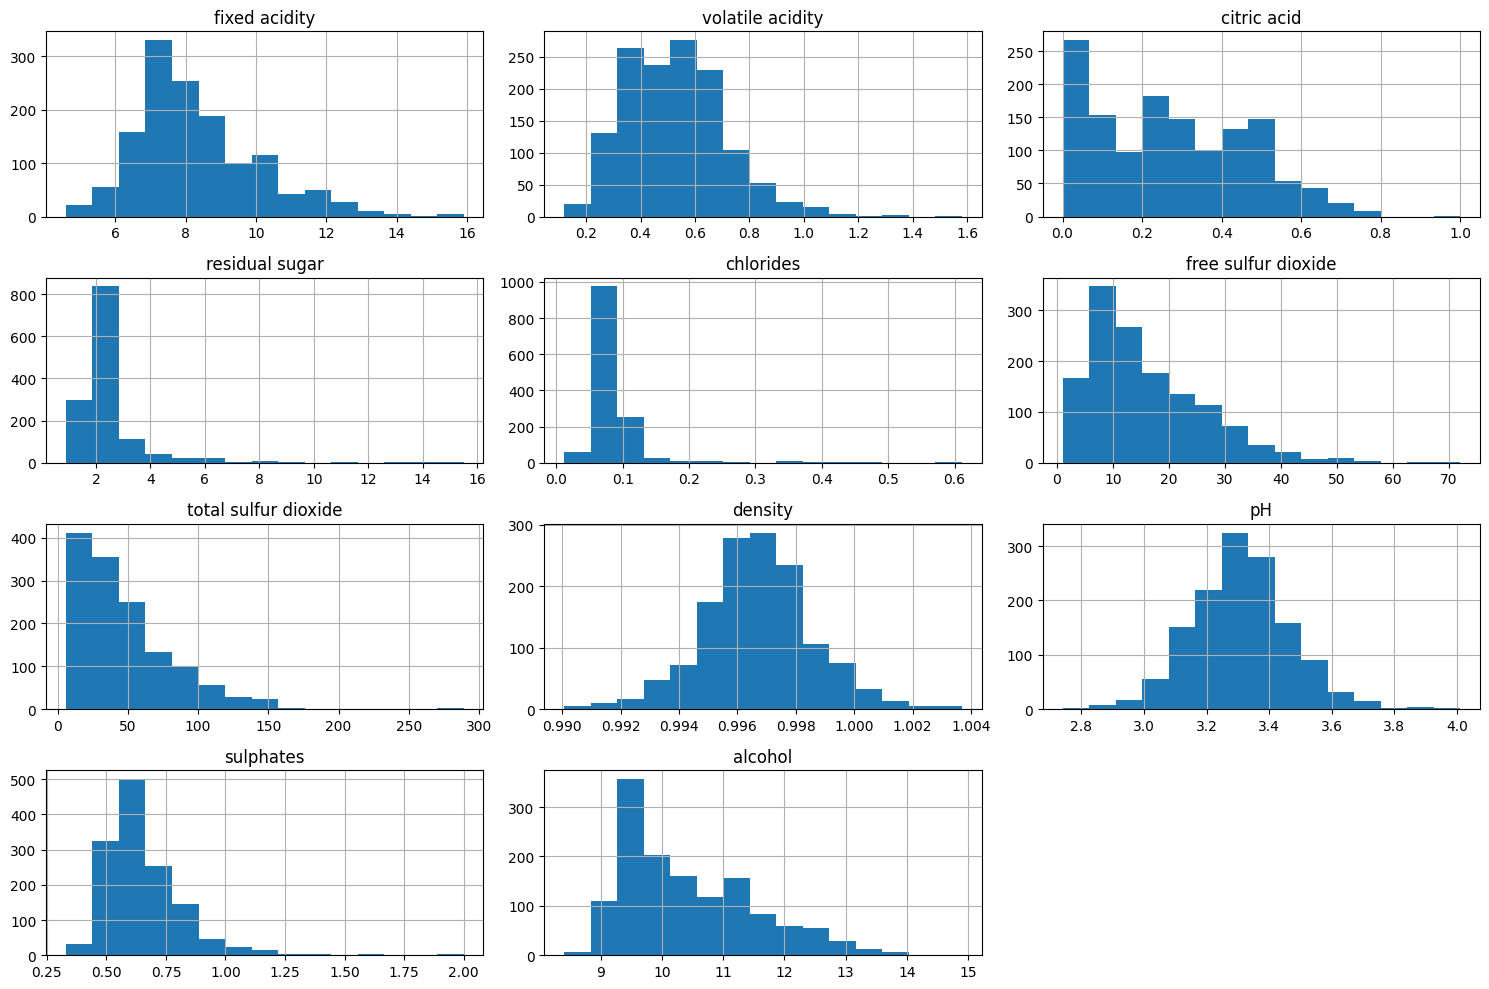

In [17]:
# generamos un histograma para todas las columnas numéricas del DataFrame
df.hist(bins=15, figsize=(15, 10))
# ajustamos el diseño de la gráfica para evitar superposición de elementos
plt.tight_layout()
# mostramos el histograma
plt.show()

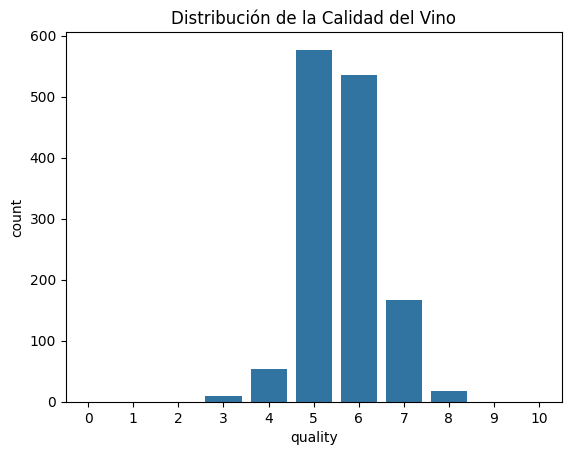

In [18]:

# creamos un gráfico de barras para la distribución de la columna 'quality'
sns.countplot(x='quality', data=df)
# añadimos un título al gráfico
plt.title('Distribución de la Calidad del Vino')
# mostramos el gráfico
plt.show()

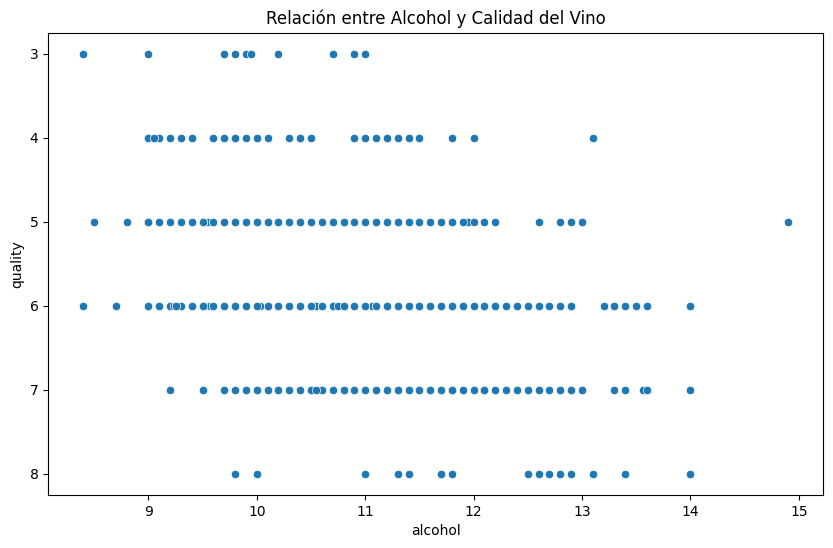

In [19]:

# creamos una figura para el gráfico de dispersión
plt.figure(figsize=(10, 6))
# generamos un gráfico de dispersión entre 'alcohol' y 'quality'
sns.scatterplot(x='alcohol', y='quality', data=df)
# añadimos un título al gráfico
plt.title('Relación entre Alcohol y Calidad del Vino')
# mostramos el gráfico
plt.show()


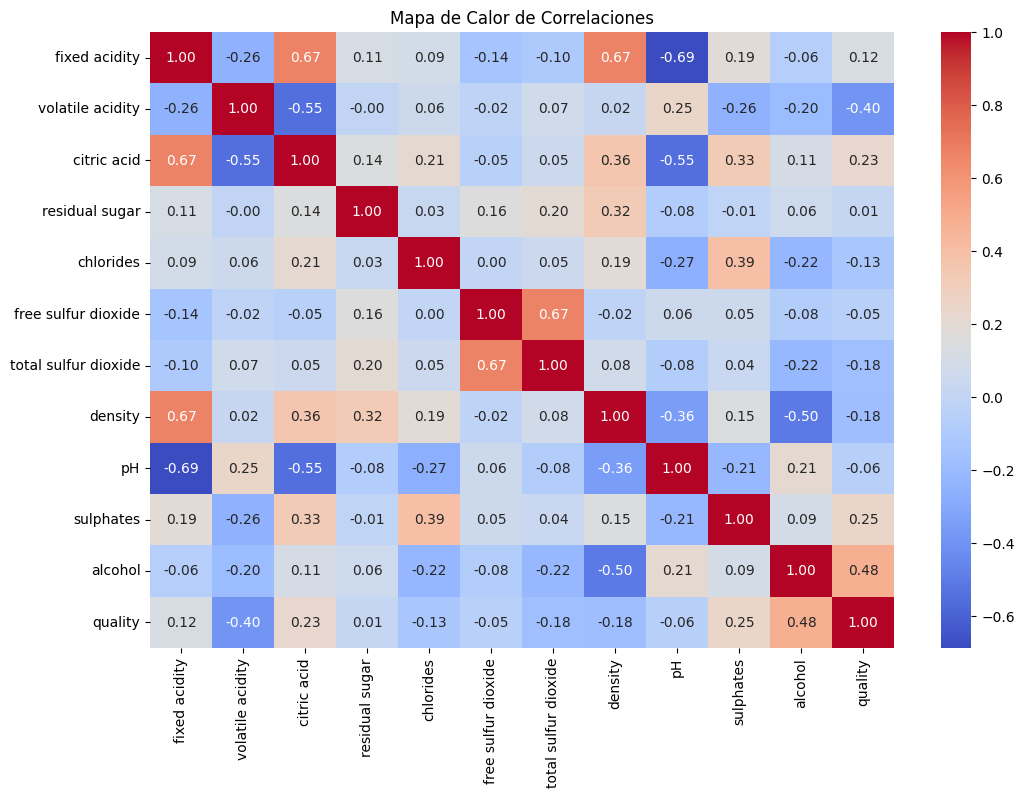

In [20]:

plt.figure(figsize=(12, 8)) # creamos una figura para el mapa de calor de correlaciones
correlation_matrix = df.corr() # calculamos la matriz de correlación entre las variables numéricas
# generamos el mapa de calor con los valores de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones') # añadimos un título al mapa de calor
plt.show() # mostramos el mapa de calor


In [21]:
df.describe().T # mostramos la estadistica descriptiva

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


* OBSERVACIONES:
    * La mayoría de las variables tienen valores variados, lo que indica que hay una diversidad de características en los vinos.
    * fixed acidity, citric acid, residual sugar, total sulfur dioxide y alcohol muestran mucha variabilidad, lo que sugiere que estos factores influyen en las características del vino.
    * el free sulfur dioxide (dióxido de azufre libre) y total sulfur dioxide(total) tienen una gran dispersión que podría deberse a diferencias en cómo se manipulan los vinos.

### 3. Implementación de Modelos:
* Modelos de Clasificación: Implementa modelos de Logistic Regression y K-Nearest Neighbors (KNN).
* Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, y F1-score.
* Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [22]:
# separamos las características (X) y la variable objetivo (y)
X = df.drop('quality', axis=1) # características
y = df['quality'] # variable objetivo
# dividimos el dataset en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler() # creamos una instancia del objeto StandardScaler para escalar las características
X_train_scaled = scaler.fit_transform(X_train) # ajustamos el scaler a los datos de entrenamiento y los escalamos
X_test_scaled = scaler.transform(X_test) # aplicamos la transformación del scaler a los datos de prueba (sin ajustar a estos)


In [24]:
# Regresión Logística
logreg_model = LogisticRegression() # creamos una instancia del modelo de regresión logística
logreg_model.fit(X_train_scaled, y_train) # ajustamos el modelo de regresión logística a los datos de entrenamiento escalados
y_pred_logreg = logreg_model.predict(X_test_scaled) # Predicciones del modelo de Regresión Logística
y_pred_logreg # viaualizamos la prediccion

array([5, 6, 6, 5, 5, 7, 6, 5, 6, 6, 7, 6, 6, 5, 7, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6,
       5, 5, 7, 6, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 7, 5, 5,
       6, 6, 6, 5, 4, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 7,
       6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 5, 4, 7, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 5, 5, 6, 7, 6, 5, 6, 6, 5, 7, 6, 5, 6, 6, 7, 5, 6, 6, 7, 6,
       5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5,
       7, 7, 5, 7, 5, 7, 5, 7, 5, 6, 5, 6, 7, 6, 6, 5, 6, 5, 7, 6, 5, 6,
       5, 6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6,
       5, 5, 7, 5, 5, 6, 6, 7, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5,
       6, 5, 6, 6, 5, 6, 6, 5])

In [25]:
# creamos una instancia del modelo K-Nearest Neighbors con 5 vecinos
knn_model = KNeighborsClassifier(n_neighbors=5)
# ajustamos el modelo KNN a los datos de entrenamiento escalados (X_train_scaled) y sus etiquetas (y_train)
knn_model.fit(X_train_scaled, y_train)
# realizamos las predicciones en los datos de prueba escalados (X_test_scaled) usando el modelo entrenado
y_pred_knn = knn_model.predict(X_test_scaled)
# mostramos las predicciones realizadas por el modelo KNN sobre los datos de prueba
y_pred_knn

array([5, 6, 7, 5, 6, 7, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6,
       5, 5, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5, 5, 6, 5, 7, 5, 5, 4, 6, 7, 5,
       6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 7, 5, 5, 5, 6, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 6, 6, 5, 7, 6, 6, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5,
       6, 6, 6, 6, 4, 5, 6, 5, 5, 7, 6, 5, 5, 5, 5, 6, 4, 5, 5, 6, 7, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5,
       6, 6, 5, 4, 6, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 6, 5, 7, 5, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 7, 6, 7, 6, 7, 5,
       6, 6, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 7, 5,
       7, 6, 5, 7, 5, 7, 5, 6, 5, 6, 5, 6, 7, 6, 6, 5, 5, 5, 7, 6, 5, 7,
       5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 7, 5, 6, 7, 6, 5, 5, 5, 5, 6,
       5, 5, 6, 5, 5, 6, 7, 7, 5, 5, 7, 6, 5, 6, 5, 5, 6, 7, 5, 6, 6, 5,
       5, 5, 5, 7, 6, 5, 6, 5])

In [26]:
# Regresión Logística
# calculamos la precisión (accuracy) del modelo de regresión logística comparando las predicciones con las etiquetas reales
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
# calculamos la precisión (precision) ponderada del modelo de regresión logística considerando todas las clases
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
# calculamos el recall ponderado del modelo de regresión logística considerando todas las clases
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
# calculamos el F1-Score ponderado del modelo de regresión logística considerando todas las clases
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')


# KNN
# calculamos la precisión (accuracy) del modelo KNN comparando las predicciones con las etiquetas reales
accuracy_knn = accuracy_score(y_test, y_pred_knn)
# calculamos la precisión (precision) ponderada del modelo KNN considerando todas las clases
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
# calculamos el recall ponderado del modelo KNN considerando todas las clases
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
# calculamos el F1-Score ponderado del modelo KNN considerando todas las clases
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')


/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/cvelazquez/anaconda3/envs/ds_mitic/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# mostramos los resultados de la evaluación
print("Resultados del modelo de Regresión Logística:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")
print(f"F1-Score: {f1_logreg:.4f}")

print("\nResultados del modelo KNN:")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-Score: {f1_knn:.4f}")

Resultados del modelo de Regresión Logística:
Accuracy: 0.6066
Precision: 0.5662
Recall: 0.6066
F1-Score: 0.5846

Resultados del modelo KNN:
Accuracy: 0.5441
Precision: 0.5122
Recall: 0.5441
F1-Score: 0.5265


Según los resultados obtenidos, en la comparacion la regresión logística tiene un mayor accuracy, tambien tiene un mayor F1-Score, por lo que podemos concluir que la regresión logística es el modelo más adecuado para este dataset.